## Importing needed libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Reading the dataset

In [3]:
df = pd.read_csv('Dataset.csv')

df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 AM         143693 non-nul

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Weather Station', 'Minimum Temperature',
       'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine',
       'Gust Trajectory', 'Air Velocity', 'Gust Trajectory at  9 AM',
       'Gust Trajectory at  3 PM', 'Air Velocity at  9 AM',
       'Air Velocity at  3 PM', 'Moisture Level at 9 AM',
       'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
       'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM',
       'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM',
       'Recorded Temperature at 3 PM', 'Rain that day', 'Rain the day after'],
      dtype='object')

## Remove unnecessary features

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.shape

(145460, 23)

In [8]:
# describe numeric columns

df.describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Count of null records for each features

In [9]:
# missing values count

df.isnull().sum()

Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

## Count of null records for categorical features

In [10]:
df_cat = df.select_dtypes(exclude=['int64', 'float64'])

df_cat.isna().sum()

Date                            0
Weather Station                 0
Gust Trajectory             10326
Gust Trajectory at  9 AM    10566
Gust Trajectory at  3 PM     4228
Rain that day                3261
Rain the day after           3267
dtype: int64


Due to the low number of missing data in non-numeric columns, we generally remove the rows that contain missing data.

In [11]:
for column_name in df_cat.columns:
    df.dropna(subset=[column_name], inplace=True)
    df_cat.dropna(subset=[column_name], inplace=True)

## Count of null records for numerical features

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_num.isna().sum()

Minimum Temperature                90
Maximum Temperature                45
Rainfall                            0
Evaporation                     50647
Sunshine                        56623
Air Velocity                        0
Air Velocity at  9 AM               0
Air Velocity at  3 PM               0
Moisture Level at 9 AM           1012
Moisture Level at 3 PM           1522
Atmospheric Pressure at 9 AM     9120
Atmospheric Pressure at 3 PM     9069
Cloudiness at 9 AM              46234
Cloudiness at 3 PM              48233
Recorded Temperature at 9 AM      343
Recorded Temperature at 3 PM      795
dtype: int64

In [13]:
num_cols = df_num.columns

num_cols

Index(['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM',
       'Air Velocity at  3 PM', 'Moisture Level at 9 AM',
       'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
       'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM',
       'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM',
       'Recorded Temperature at 3 PM'],
      dtype='object')

In [14]:
cat_cols = df_cat.columns

cat_cols

Index(['Date', 'Weather Station', 'Gust Trajectory',
       'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Rain that day',
       'Rain the day after'],
      dtype='object')

# Visualization

array([[<Axes: title={'center': 'Minimum Temperature'}>,
        <Axes: title={'center': 'Maximum Temperature'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'Air Velocity'}>,
        <Axes: title={'center': 'Air Velocity at  9 AM'}>,
        <Axes: title={'center': 'Air Velocity at  3 PM'}>],
       [<Axes: title={'center': 'Moisture Level at 9 AM'}>,
        <Axes: title={'center': 'Moisture Level at 3 PM'}>,
        <Axes: title={'center': 'Atmospheric Pressure at 9 AM'}>,
        <Axes: title={'center': 'Atmospheric Pressure at 3 PM'}>],
       [<Axes: title={'center': 'Cloudiness at 9 AM'}>,
        <Axes: title={'center': 'Cloudiness at 3 PM'}>,
        <Axes: title={'center': 'Recorded Temperature at 9 AM'}>,
        <Axes: title={'center': 'Recorded Temperature at 3 PM'}>]],
      dtype=object)

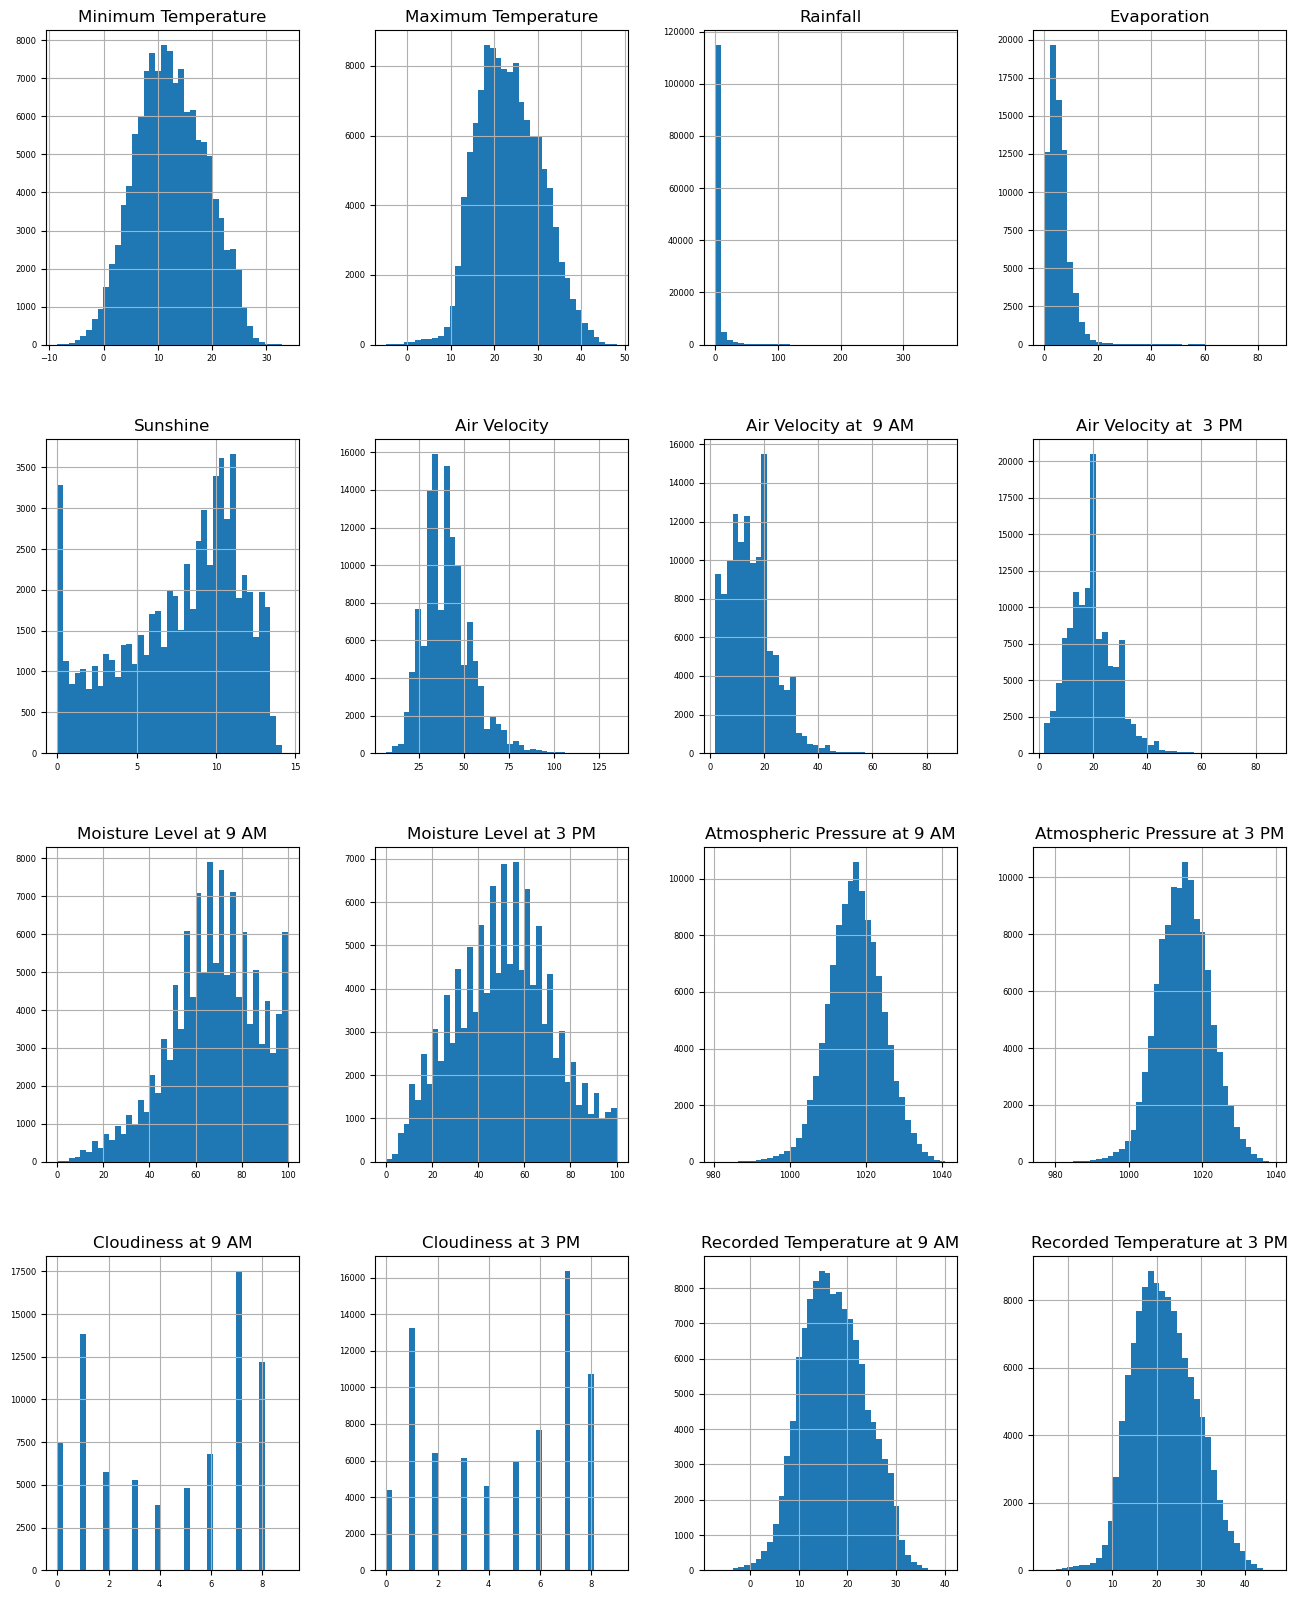

In [15]:
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

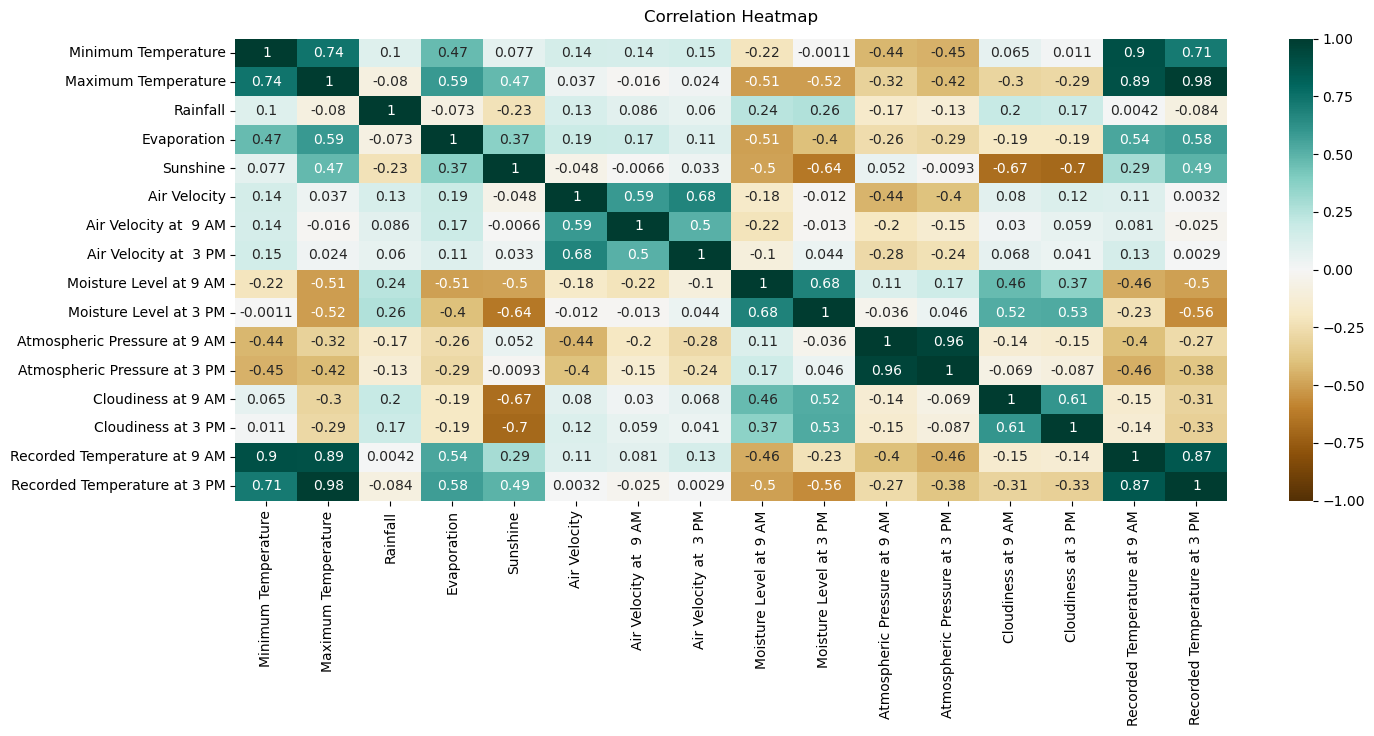

In [16]:
# correlation matrix

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()


## Remove unnecessary features based on heatmap and correlation

In [17]:
# remove Recorded Temperature at 3 PM and 9 AM columns because they are highly correlated with Maximum Temperature and Minimum Temperature

df_num.drop(['Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'], axis=1, inplace=True)

# remove atmospheric pressure at 3 PM because it is highly correlated with atmospheric pressure at 9 AM

df_num.drop(['Atmospheric Pressure at 3 PM'], axis=1, inplace=True)

num_cols = df_num.columns

## Visualizing the Distribution of "Rain the day afte" Based on All Numeric Features

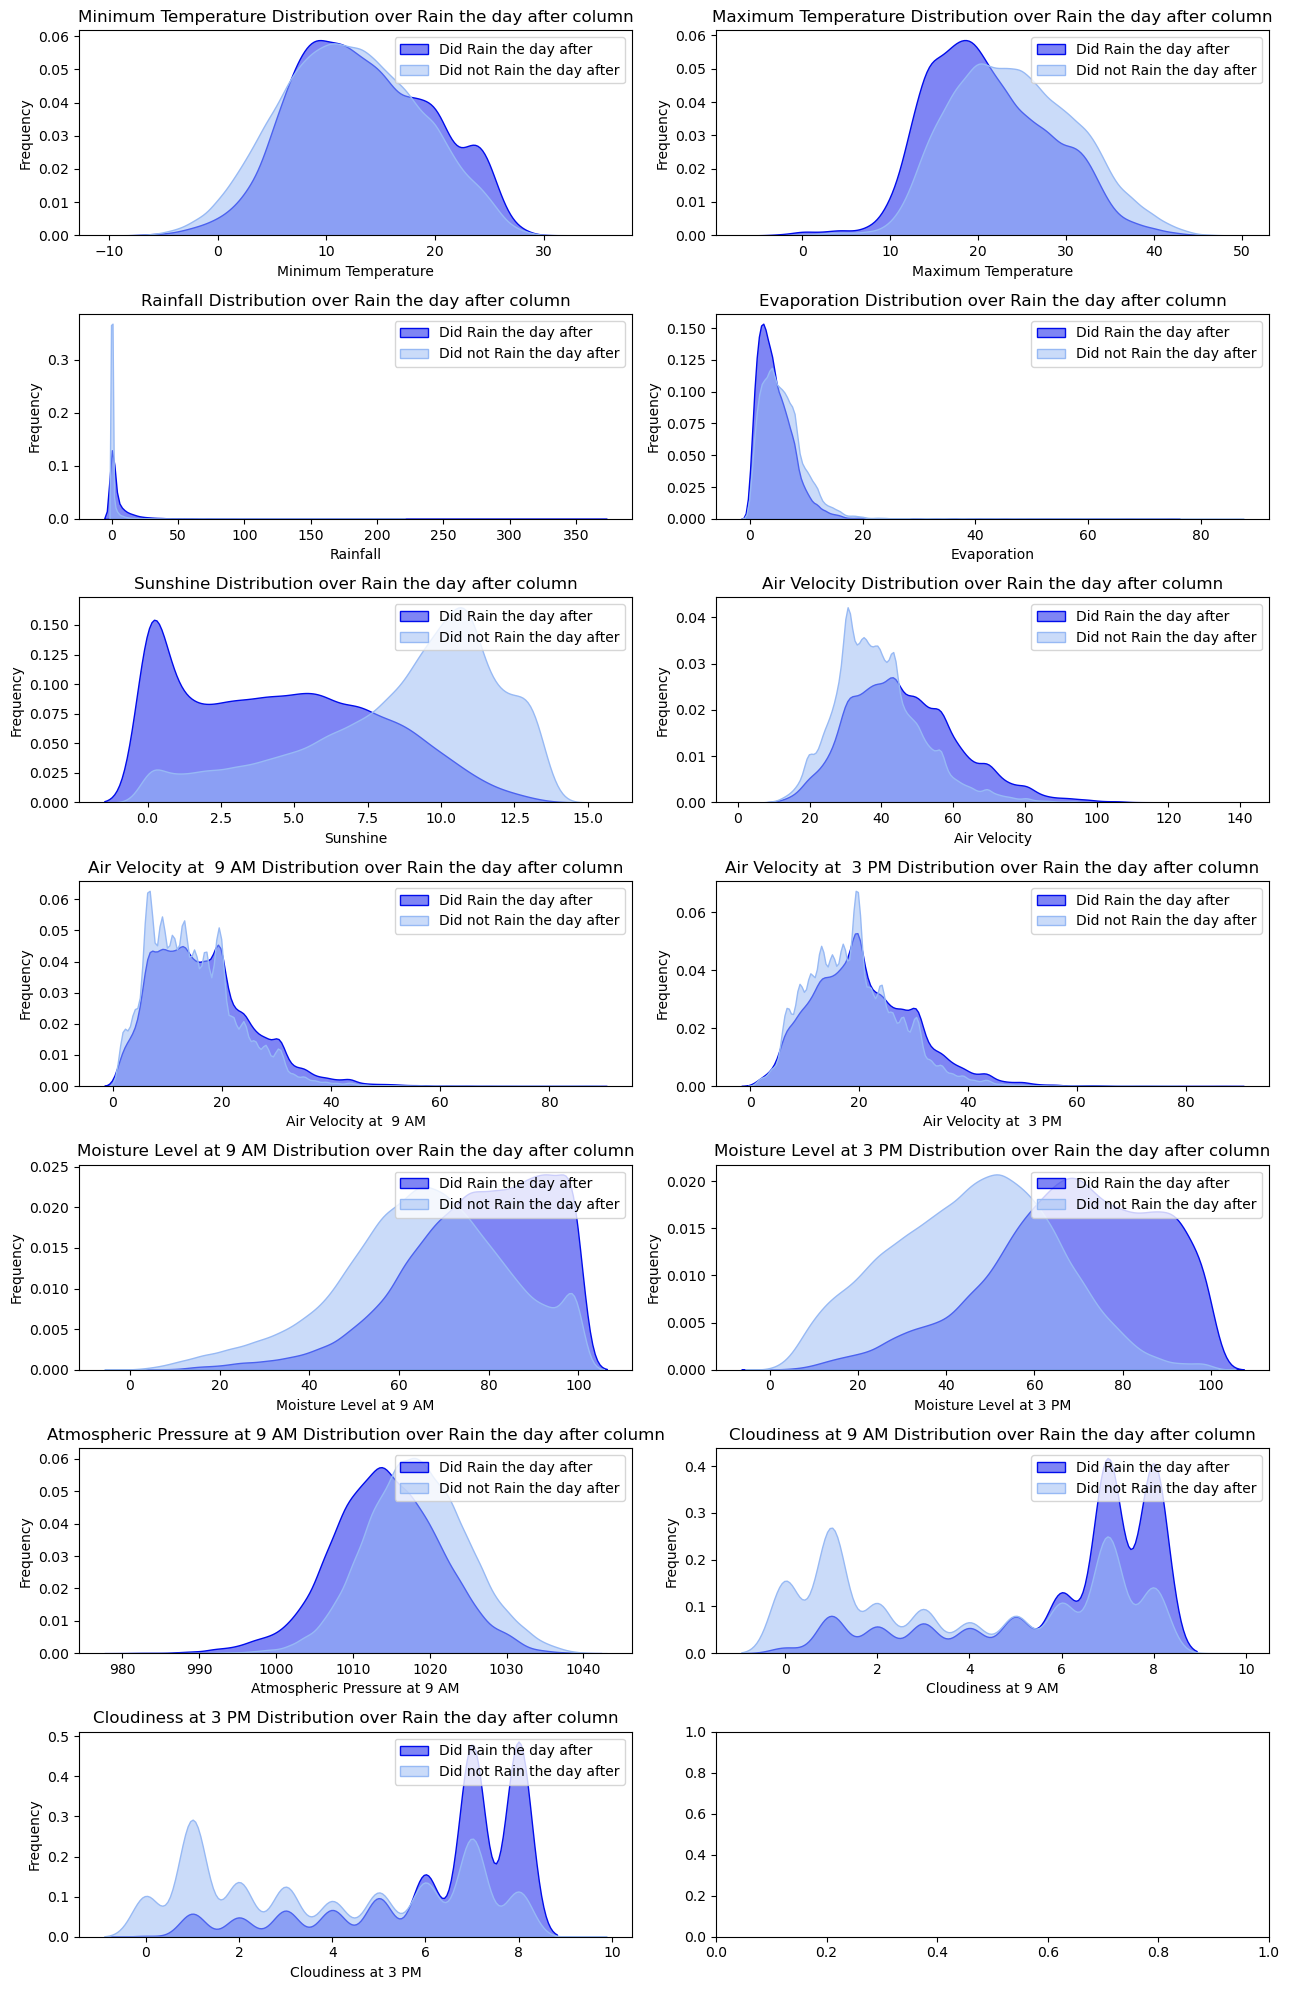

In [18]:
fig, axes = plt.subplots(nrows=len(num_cols) // 2 + 1, ncols=2, figsize=(13, 20))

for idx, column in enumerate(df[num_cols]):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(df[df["Rain the day after"] == 'Yes'][column], alpha=0.5, fill=True, color="#000CEB", label="Did Rain the day after", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["Rain the day after"] == 'No'][column], alpha=0.5, fill=True, color="#97B9F4", label="Did not Rain the day after", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Rain the day after column")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

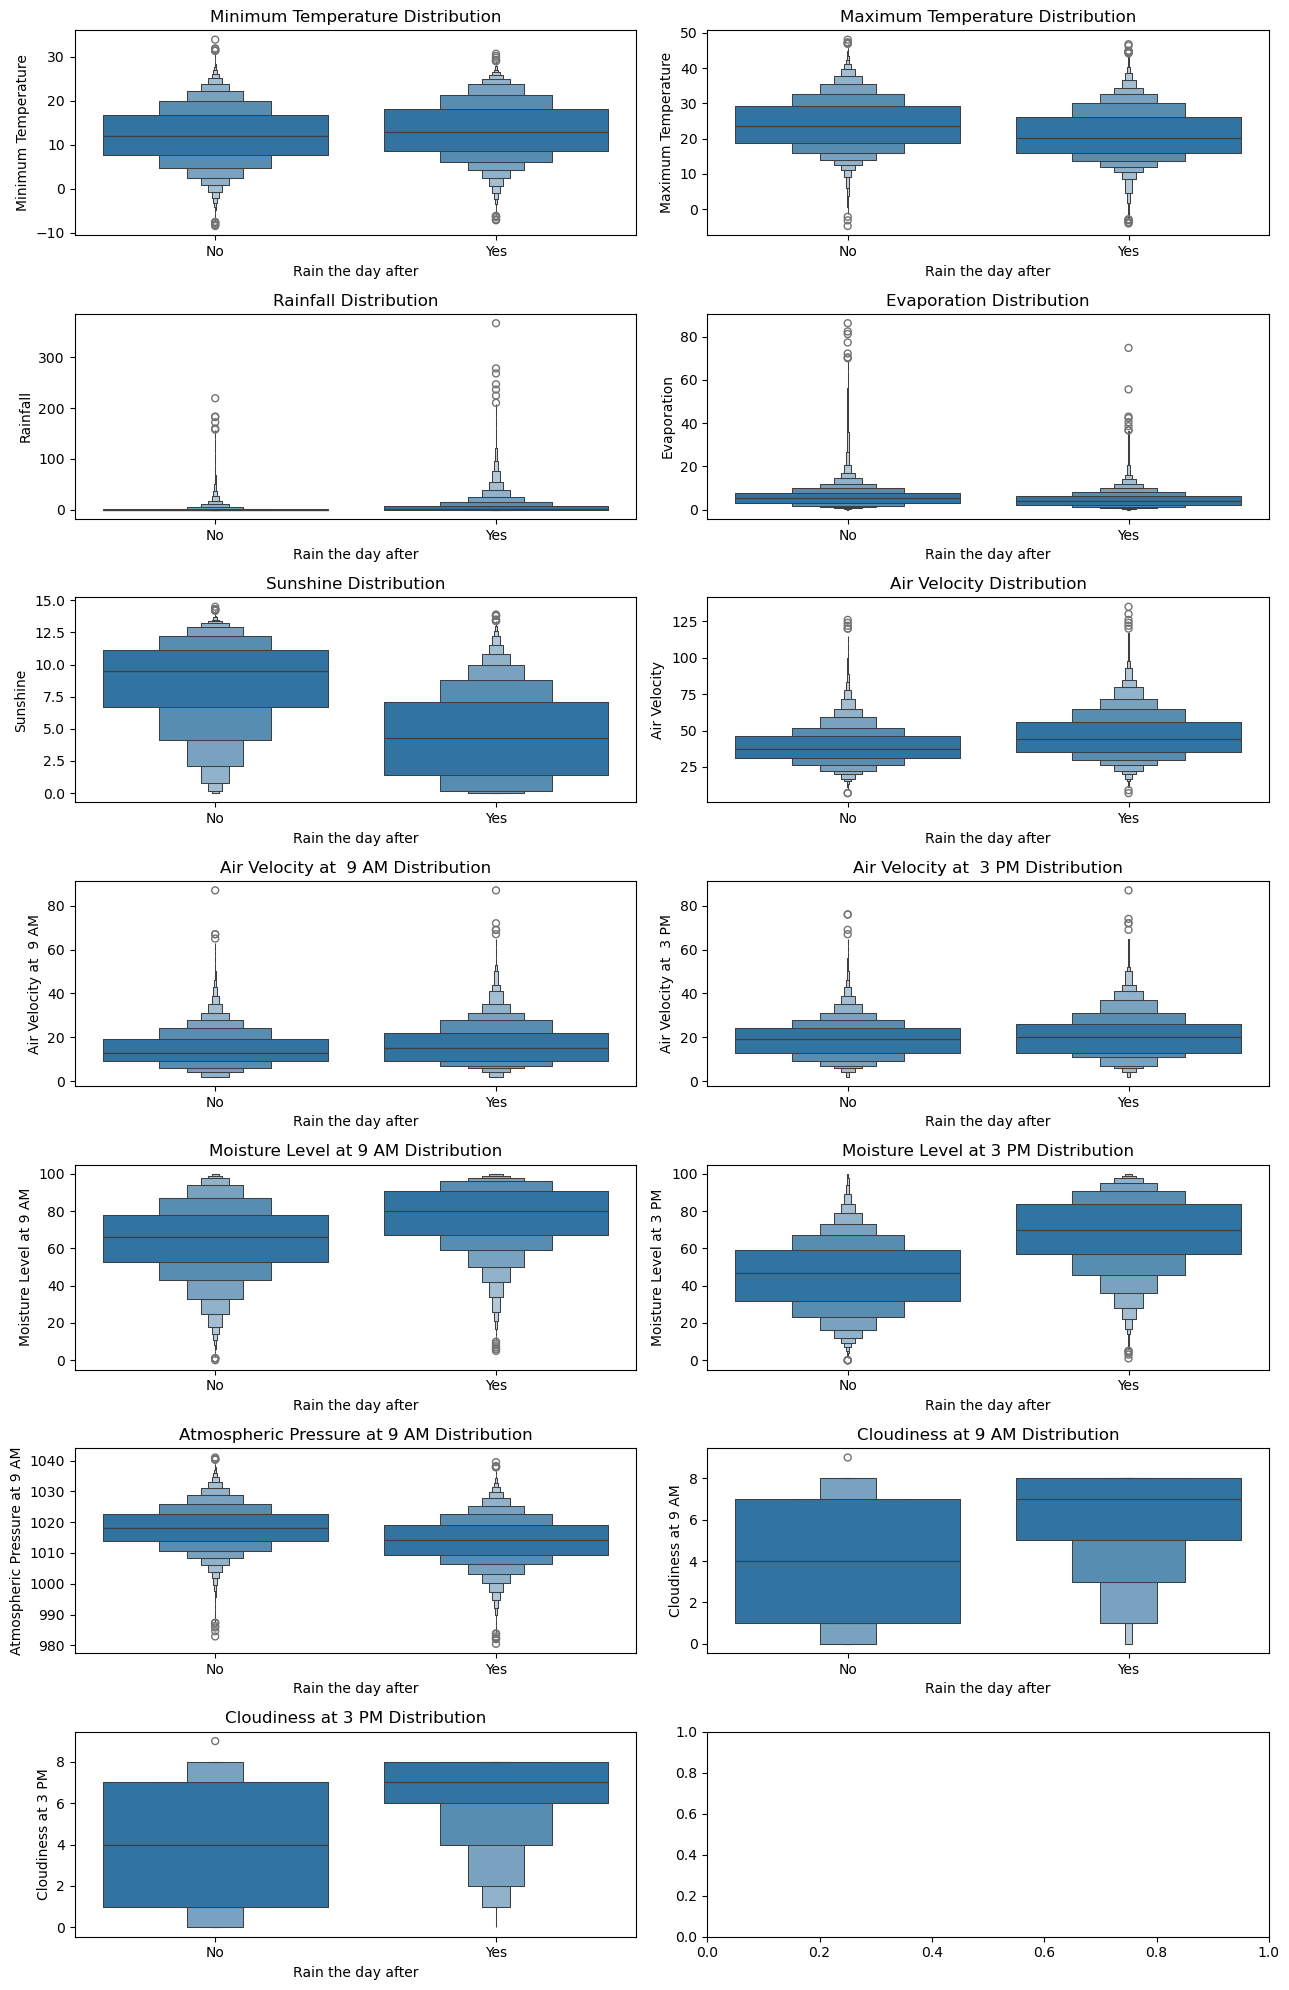

In [19]:
fig, axes = plt.subplots(nrows=len(num_cols) // 2 + 1, ncols=2, figsize=(13, 20))

for idx, column in enumerate(df[num_cols]):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.boxenplot( x='Rain the day after' , y=column , data=pd.concat([df[num_cols], df['Rain the day after']], axis = 1), ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel("Rain the day after")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

## Convert the date column to numeric and split it into day, month, and year.

In [20]:
df_cat.nunique()

Date                        3417
Weather Station               47
Gust Trajectory               16
Gust Trajectory at  9 AM      16
Gust Trajectory at  3 PM      16
Rain that day                  2
Rain the day after             2
dtype: int64

In [21]:
df_cat['Date'] = pd.to_datetime(df_cat['Date'])

df_cat['Year'] = df_cat['Date'].dt.year
df_cat['Month'] = df_cat['Date'].dt.month
df_cat['Day'] = df_cat['Date'].dt.day

df_cat.drop(['Date'], axis=1, inplace=True)

df_cat.head()

,Weather Station,Gust Trajectory,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Rain that day,Rain the day after,Year,Month,Day
0,Station 2,W,W,WNW,No,No,2008,12,1
1,Station 2,WNW,NNW,WSW,No,No,2008,12,2
2,Station 2,WSW,W,WSW,No,No,2008,12,3
3,Station 2,NE,SE,E,No,No,2008,12,4
4,Station 2,W,ENE,NW,No,No,2008,12,5


In [22]:
# check labels in location variable

df_cat['Weather Station'].unique()

array(['Station 2', 'Station 4', 'Station 10', 'Station 11', 'Station 21',
       'Station 26', 'Station 27', 'Station 30', 'Station 34',
       'Station 37', 'Station 38', 'Station 42', 'Station 45',
       'Station 47', 'Station 9', 'Station 40', 'Station 23', 'Station 5',
       'Station 6', 'Station 35', 'Station 19', 'Station 18',
       'Station 20', 'Station 25', 'Station 33', 'Station 44',
       'Station 12', 'Station 7', 'Station 8', 'Station 14', 'Station 39',
       'Station 0', 'Station 22', 'Station 28', 'Station 48',
       'Station 46', 'Station 29', 'Station 32', 'Station 31',
       'Station 36', 'Station 43', 'Station 15', 'Station 17',
       'Station 3', 'Station 13', 'Station 16', 'Station 41'],
      dtype=object)

In [23]:
df_cat['Weather Station'].value_counts()

Weather Station
Station 13    3119
Station 15    3106
Station 31    3049
Station 7     3029
Station 19    2943
Station 38    2941
Station 10    2925
Station 32    2924
Station 48    2917
Station 20    2903
Station 8     2900
Station 22    2898
Station 5     2895
Station 33    2890
Station 39    2884
Station 27    2868
Station 36    2865
Station 14    2832
Station 47    2817
Station 28    2812
Station 42    2801
Station 26    2790
Station 35    2771
Station 9     2762
Station 3     2748
Station 0     2746
Station 44    2745
Station 6     2725
Station 46    2653
Station 21    2635
Station 11    2568
Station 23    2524
Station 43    2506
Station 17    2503
Station 29    2469
Station 4     2458
Station 2     2445
Station 12    2418
Station 30    2366
Station 40    2322
Station 37    2285
Station 18    2240
Station 45    2203
Station 34    2073
Station 25    1518
Station 16    1473
Station 41    1446
Name: count, dtype: int64

In [24]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df_cat['Weather Station'], drop_first=True).head()

,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17,Station 18,Station 19,...,Station 44,Station 45,Station 46,Station 47,Station 48,Station 5,Station 6,Station 7,Station 8,Station 9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Convert categorical features to numerical

In [25]:
# replace rain that day with 1 and no rain with 0
df_cat['Rain that day'] = df_cat['Rain that day'].replace({'No': 0, 'Yes': 1})

# replace rain tomorrow with 1 and no rain with 0
df_cat['Rain the day after'] = df_cat['Rain the day after'].replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_4339/3132808431.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat['Rain that day'] = df_cat['Rain that day'].replace({'No': 0, 'Yes': 1})
/tmp/ipykernel_4339/3132808431.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat['Rain the day after'] = df_cat['Rain the day after'].replace({'No': 0, 'Yes': 1})


## Label encoding

In [26]:
# label encoding

le = LabelEncoder()

# applly label encoding in Weather station and Gust Trajectory columns

df_cat['Weather Station'] = le.fit_transform(df_cat['Weather Station'])

In [27]:
df_cat['Gust Trajectory'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [28]:
df_cat['Gust Trajectory'] = le.fit_transform(df_cat['Gust Trajectory'])

df_cat['Gust Trajectory at  3 PM'] = le.fit_transform(df_cat['Gust Trajectory at  3 PM'])

df_cat['Gust Trajectory at  9 AM'] = le.fit_transform(df_cat['Gust Trajectory at  9 AM'])

## Concate features together

In [29]:
df_cat.head()

,Weather Station,Gust Trajectory,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Rain that day,Rain the day after,Year,Month,Day
0,11,13,13,14,0,0,2008,12,1
1,11,14,6,15,0,0,2008,12,2
2,11,15,13,15,0,0,2008,12,3
3,11,4,9,0,0,0,2008,12,4
4,11,13,1,7,0,0,2008,12,5


In [30]:
df_num.head()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Cloudiness at 9 AM,Cloudiness at 3 PM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,8.0,NaN
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,NaN,NaN
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,NaN,2.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,NaN,NaN
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,7.0,8.0


In [31]:
df = pd.concat([df_cat, df_num], axis=1)

df.head()

,Weather Station,Gust Trajectory,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Rain that day,Rain the day after,Year,Month,Day,Minimum Temperature,...,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Cloudiness at 9 AM,Cloudiness at 3 PM
0,11,13,13,14,0,0,2008,12,1,13.4,...,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,8.0,NaN
1,11,14,6,15,0,0,2008,12,2,7.4,...,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,NaN,NaN
2,11,15,13,15,0,0,2008,12,3,12.9,...,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,NaN,2.0
3,11,4,9,0,0,0,2008,12,4,9.2,...,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,NaN,NaN
4,11,13,1,7,0,0,2008,12,5,17.5,...,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,7.0,8.0


## Split train and test set

In [32]:
# split df into training and testing sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

## Count of null records in test

In [33]:
test.isna().sum()

Weather Station                     0
Gust Trajectory                     0
Gust Trajectory at  9 AM            0
Gust Trajectory at  3 PM            0
Rain that day                       0
Rain the day after                  0
Year                                0
Month                               0
Day                                 0
Minimum Temperature                19
Maximum Temperature                10
Rainfall                            0
Evaporation                     10146
Sunshine                        11372
Air Velocity                        0
Air Velocity at  9 AM               0
Air Velocity at  3 PM               0
Moisture Level at 9 AM            202
Moisture Level at 3 PM            303
Atmospheric Pressure at 9 AM     1819
Cloudiness at 9 AM               9171
Cloudiness at 3 PM               9639
dtype: int64

## Removing Missing Data with Low Frequency

In [34]:
columns = ['Minimum Temperature', 'Maximum Temperature', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM']

test.dropna(subset=columns, inplace=True)

In [35]:
test.isna().sum()

Weather Station                    0
Gust Trajectory                    0
Gust Trajectory at  9 AM           0
Gust Trajectory at  3 PM           0
Rain that day                      0
Rain the day after                 0
Year                               0
Month                              0
Day                                0
Minimum Temperature                0
Maximum Temperature                0
Rainfall                           0
Evaporation                     8250
Sunshine                        9309
Air Velocity                       0
Air Velocity at  9 AM              0
Air Velocity at  3 PM              0
Moisture Level at 9 AM             0
Moisture Level at 3 PM             0
Atmospheric Pressure at 9 AM       0
Cloudiness at 9 AM              7386
Cloudiness at 3 PM              7737
dtype: int64

## Filling missing values with high frequency using mean of trainset

In [36]:
# filling missing values in test dataset with mean of training datasets, just like what we will do for train dataset

# replace cloudiness at 9 AM / 3 PM null values with mean of cloudiness at 9 am with same month and same year

test['Cloudiness at 9 AM'] = train['Cloudiness at 9 AM'].fillna(train.groupby(['Year', 'Month'])['Cloudiness at 9 AM'].transform('mean'))
test['Cloudiness at 3 PM'] = train['Cloudiness at 3 PM'].fillna(train.groupby(['Year', 'Month'])['Cloudiness at 3 PM'].transform('mean'))

# replace Sunshine null values with mean of sunshine with same month and same year

test['Sunshine'] = train['Sunshine'].fillna(train.groupby(['Year', 'Month'])['Sunshine'].transform('mean'))

# replace Evaporation null values with mean of evaporation with same month and same year

test['Evaporation'] = train['Evaporation'].fillna(train.groupby(['Year', 'Month'])['Evaporation'].transform('mean'))


In [37]:
test.isna().sum()

Weather Station                 0
Gust Trajectory                 0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Rain that day                   0
Rain the day after              0
Year                            0
Month                           0
Day                             0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Air Velocity                    0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
dtype: int64

## Filling missing values of train set

### Drop null records of train set with low frequency

In [38]:
train.isna().sum()

Weather Station                     0
Gust Trajectory                     0
Gust Trajectory at  9 AM            0
Gust Trajectory at  3 PM            0
Rain that day                       0
Rain the day after                  0
Year                                0
Month                               0
Day                                 0
Minimum Temperature                71
Maximum Temperature                35
Rainfall                            0
Evaporation                     40501
Sunshine                        45251
Air Velocity                        0
Air Velocity at  9 AM               0
Air Velocity at  3 PM               0
Moisture Level at 9 AM            810
Moisture Level at 3 PM           1219
Atmospheric Pressure at 9 AM     7301
Cloudiness at 9 AM              37063
Cloudiness at 3 PM              38594
dtype: int64

In [39]:
columns = ['Minimum Temperature', 'Maximum Temperature', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM']

train.dropna(subset=columns, inplace=True)

In [40]:
train.isna().sum()

Weather Station                     0
Gust Trajectory                     0
Gust Trajectory at  9 AM            0
Gust Trajectory at  3 PM            0
Rain that day                       0
Rain the day after                  0
Year                                0
Month                               0
Day                                 0
Minimum Temperature                 0
Maximum Temperature                 0
Rainfall                            0
Evaporation                     32902
Sunshine                        36985
Air Velocity                        0
Air Velocity at  9 AM               0
Air Velocity at  3 PM               0
Moisture Level at 9 AM              0
Moisture Level at 3 PM              0
Atmospheric Pressure at 9 AM        0
Cloudiness at 9 AM              29933
Cloudiness at 3 PM              30921
dtype: int64

### filling missing values with high frequency in test dataset with mean of train dataset

In [41]:
# filling missing values in test dataset with mean of train dataset

# replace cloudiness at 9 AM / 3 PM null values with mean of cloudiness at 9 am with same month and same year

train['Cloudiness at 9 AM'] = train['Cloudiness at 9 AM'].fillna(train.groupby(['Year', 'Month'])['Cloudiness at 9 AM'].transform('mean'))
train['Cloudiness at 3 PM'] = train['Cloudiness at 3 PM'].fillna(train.groupby(['Year', 'Month'])['Cloudiness at 3 PM'].transform('mean'))

# replace Sunshine null values with mean of sunshine with same month and same year

train['Sunshine'] = train['Sunshine'].fillna(train.groupby(['Year', 'Month'])['Sunshine'].transform('mean'))

# replace Evaporation null values with mean of evaporation with same month and same year

train['Evaporation'] = train['Evaporation'].fillna(train.groupby(['Year', 'Month'])['Evaporation'].transform('mean'))


In [42]:
train.isna().sum()

Weather Station                 0
Gust Trajectory                 0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Rain that day                   0
Rain the day after              0
Year                            0
Month                           0
Day                             0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Air Velocity                    0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
dtype: int64

### check distribution after preprocessing

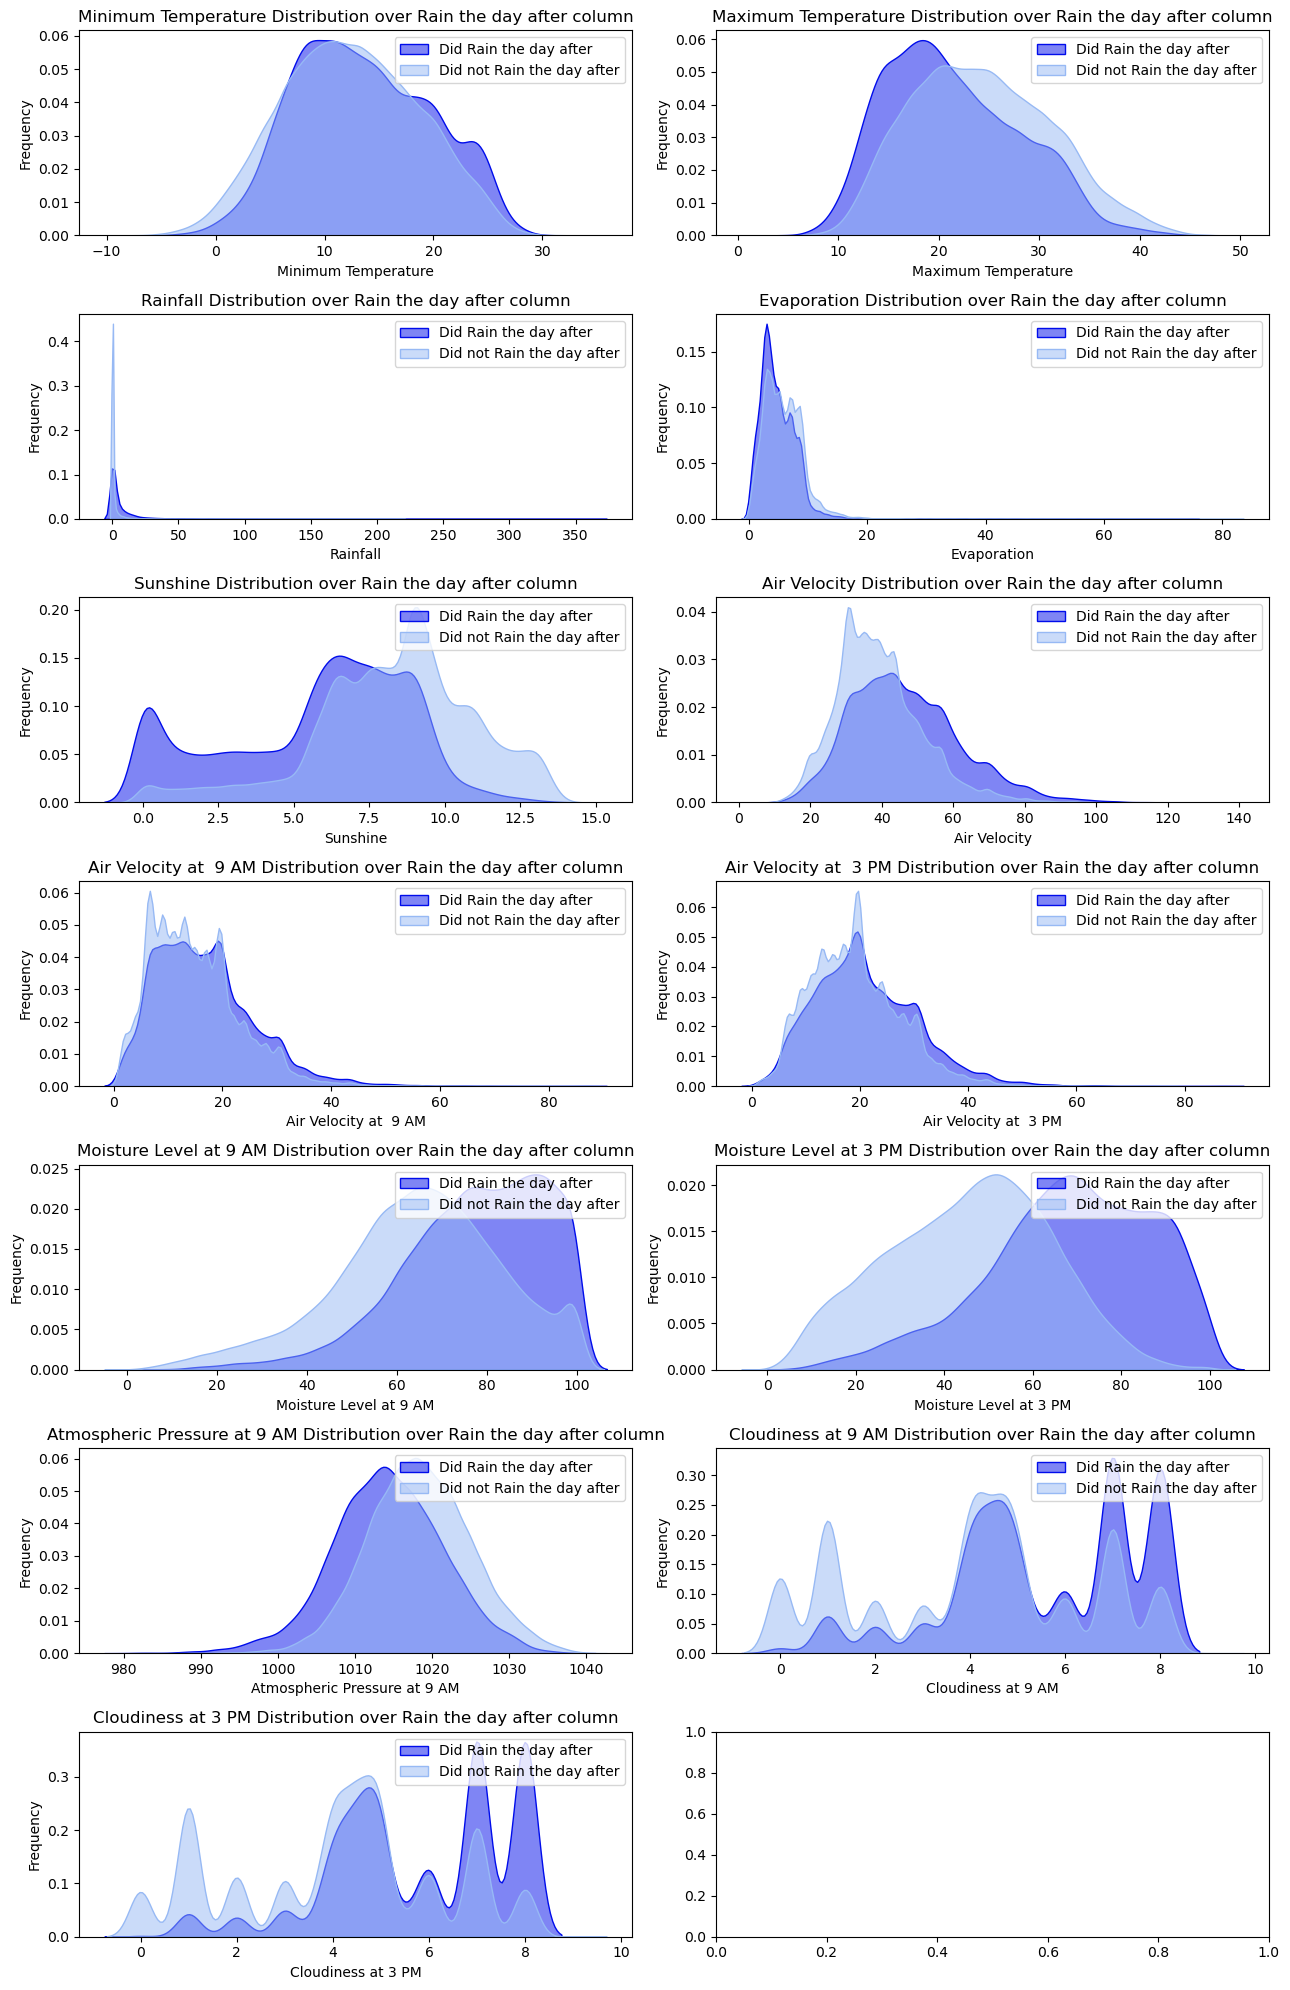

In [43]:
fig, axes = plt.subplots(nrows=len(num_cols) // 2 + 1, ncols=2, figsize=(13, 20))

for idx, column in enumerate(train[num_cols]):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(train[train["Rain the day after"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="Did Rain the day after", ax=axes[row_idx, col_idx])
    sns.kdeplot(train[train["Rain the day after"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Did not Rain the day after", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Rain the day after column")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

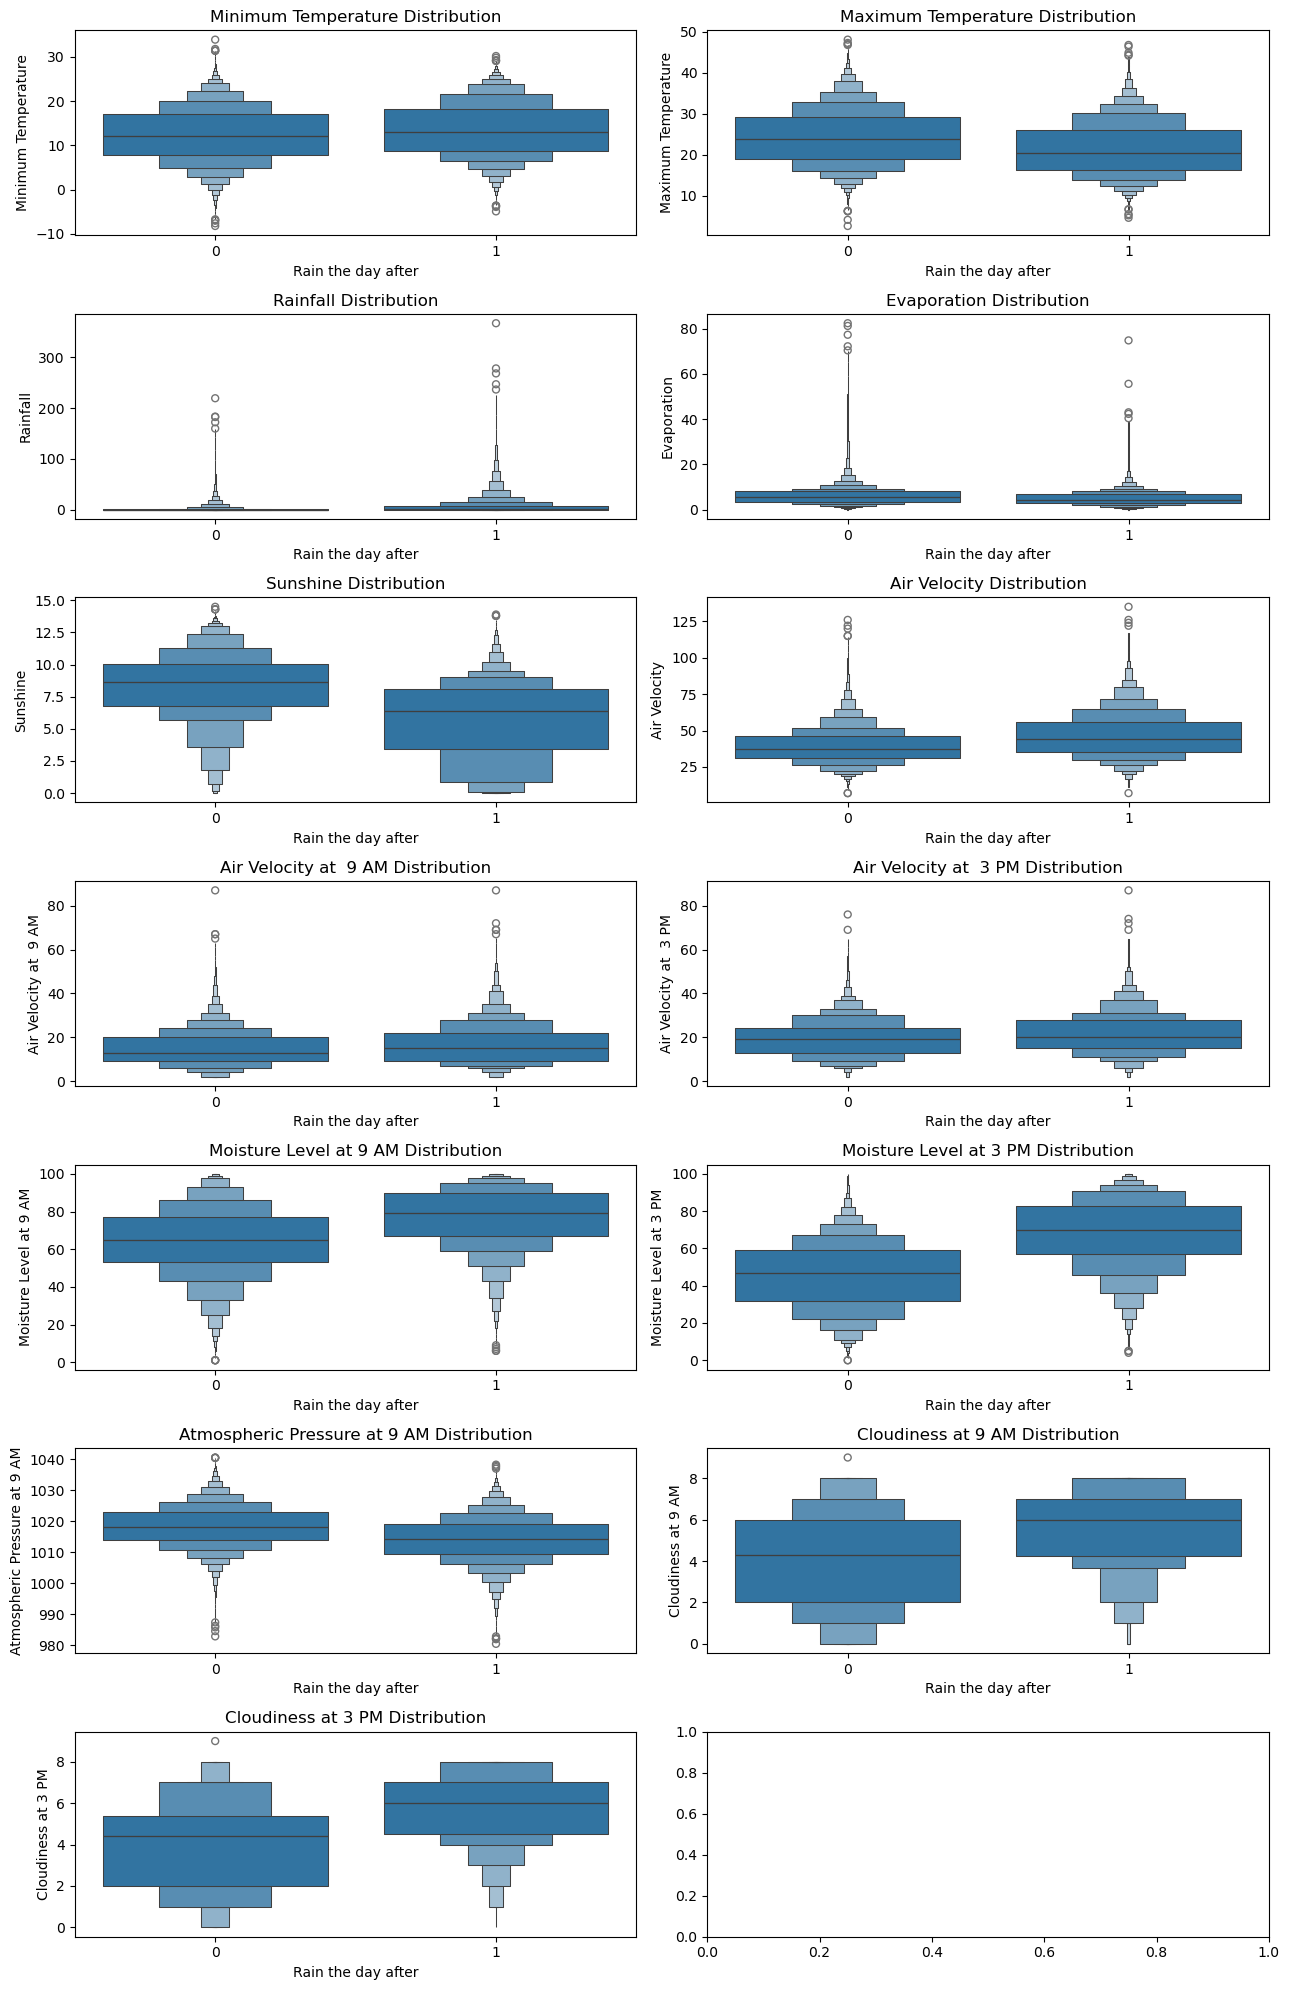

In [44]:
fig, axes = plt.subplots(nrows=len(num_cols) // 2 + 1, ncols=2, figsize=(13, 20))

for idx, column in enumerate(train[num_cols]):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.boxenplot( x='Rain the day after' , y=column , data=pd.concat([train[num_cols], train['Rain the day after']], axis = 1), ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel("Rain the day after")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

## Remove outlier data

In [45]:
# Outlier Equation
def outlier_thresholds (dataframe, column, q1=0.25, q3=0.75) :
    quartile1 = dataframe[column].quantile(q1)
    quartile3 = dataframe[column].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

# Checking Outliers
def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    outliers = (dataframe[column] > up_limit) | (dataframe[column] < low_limit)
    if outliers.any():
        return True
    else:
        return False

# Removing the outliers
def replace_with_thresholds (dataframe, column) :
    low_limit , up_limit = outlier_thresholds(dataframe, column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column] = up_limit

In [46]:
print('After removing the outliers :')

for column in (train[num_cols]):
    replace_with_thresholds(train[num_cols], column)
    print(column, check_outlier(train[num_cols], column))

After removing the outliers :
Minimum Temperature True
Maximum Temperature True
Rainfall True
Evaporation True
Sunshine True
Air Velocity True
Air Velocity at  9 AM True
Air Velocity at  3 PM True
Moisture Level at 9 AM True
Moisture Level at 3 PM False
Atmospheric Pressure at 9 AM True
Cloudiness at 9 AM False
Cloudiness at 3 PM False


## Check balance of training set

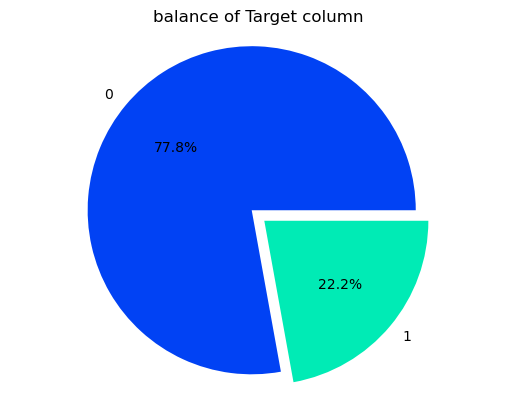

In [47]:
target_column = train['Rain the day after'].value_counts()

# pie chart for target column
plt.pie(target_column, labels = target_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0142F4","#00EBB5"])
plt.title("balance of Target column")
plt.axis("equal")
plt.show()

In [48]:
X_train = train.drop(['Rain the day after'], axis=1)
y_train = train['Rain the day after']

X_test = test.drop(['Rain the day after'], axis=1)
y_test = test['Rain the day after']

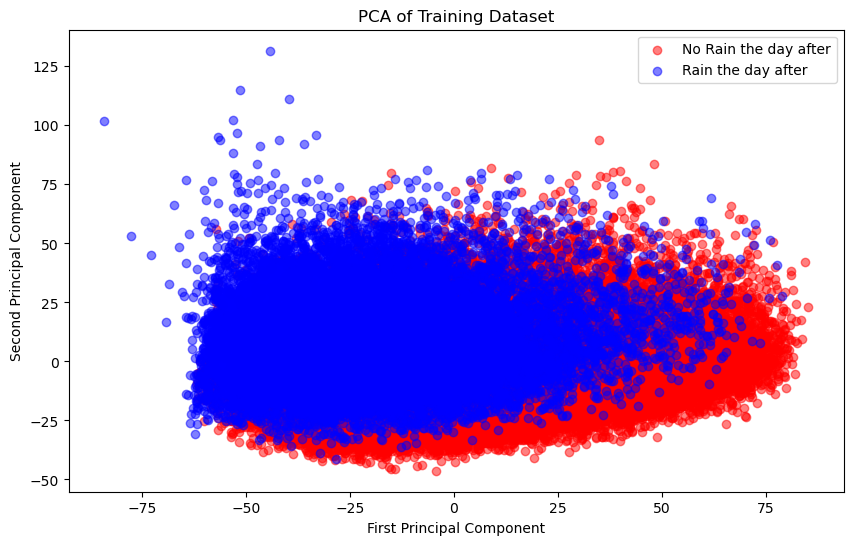

In [49]:
# plot the data trainign data set using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))

plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], color='red', label='No Rain the day after', alpha=0.5)

plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], color='blue', label='Rain the day after', alpha=0.5)

plt.title('PCA of Training Dataset')

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.legend()

plt.show()


In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [51]:
X_train = pd.concat([X_train, X_val])

In [52]:
y_train = pd.concat([y_train, y_val])

In [53]:
X_train.shape

(90365, 21)

In [54]:
y_train.shape

(90365,)

## Make the dataset balance

In [55]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Decision tree

### Pruning, hyperparameter

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=0)

# تعریف فضای هایپرپارامترها برای جستجوی تصادفی
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(randint(3, 20).rvs(5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'ccp_alpha': [0.0] + list(randint(0, 10).rvs(3) / 1000)
}

# random search based on accuracy to find best parameters
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=0, n_jobs=-1, scoring='accuracy')

# random search on validation
random_search.fit(X_val, y_val)

# printing best hyperparameters and alpha for pruning
print(f'Best hyperparameters and ccp_alpha: {random_search.best_params_}')

# Creating Model based on best parameters
best_dt = random_search.best_estimator_

# printing accuracy
accuracy = accuracy_score(y_test, best_dt.predict(X_test))
print(f'Accuracy of the optimized model: {accuracy}')

Best hyperparameters and ccp_alpha: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 4}
Accuracy of the optimized model: 0.8377074574020801


In [57]:
# DECISION TREE CLASSIFIER without sampling

clf = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_split=12, min_samples_leaf=1, criterion='entropy', ccp_alpha=0.0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Classification report

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     17579
           1       0.70      0.51      0.59      5016

    accuracy                           0.84     22595
   macro avg       0.78      0.72      0.75     22595
weighted avg       0.83      0.84      0.83     22595



In [60]:
# Under Sample

clf = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_split=12, min_samples_leaf=1, criterion='entropy', ccp_alpha=0.0)

clf.fit(X_train_rus, y_train_rus)
y_pred = clf.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     17579
           1       0.50      0.77      0.60      5016

    accuracy                           0.78     22595
   macro avg       0.71      0.77      0.72     22595
weighted avg       0.83      0.78      0.79     22595



In [62]:
# Over Sample

clf = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_split=12, min_samples_leaf=1, criterion='entropy', ccp_alpha=0.0)

clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

In [63]:
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     17579
           1       0.52      0.66      0.58      5016

    accuracy                           0.79     22595
   macro avg       0.71      0.74      0.72     22595
weighted avg       0.81      0.79      0.80     22595



# KNN

### Normalization and dimension reduction

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

pca = PCA(n_components=15)

X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

### hyperparameter tuning

In [65]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn = KNeighborsClassifier()

# Defining different parameters
param_dist = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# random search based on accuracy
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, random_state=42, cv=5, refit=False, scoring='accuracy')

# Random search on Validation
random_search.fit(X_val, y_val)

# Printing best parameters
print("بهترین هایپرپارامترها:", random_search.best_params_)

# Using parameters for model
best_knn = KNeighborsClassifier(**random_search.best_params_)

# Training based on best parameters
best_knn.fit(X_train_pca, y_train)

# predict
accuracy = best_knn.score(X_test_pca, y_test)
print(f'دقت مدل روی دیتاست تست: {accuracy:.2f}')

y_pred = best_knn.predict(X_test_pca)

/home/sina/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


بهترین هایپرپارامترها: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
دقت مدل روی دیتاست تست: 0.84


### Classification report

In [66]:
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17579
           1       0.70      0.45      0.55      5016

    accuracy                           0.84     22595
   macro avg       0.78      0.70      0.72     22595
weighted avg       0.82      0.84      0.82     22595



# SVM

### Standardization and dimension reduction

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=15)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Hyperparameter tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import expon

# SVM
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': expon(scale=100), # Parameters for C
    'gamma': expon(scale=.1) # Parameters for gamma
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(svc, parameters, n_iter=10, cv=5, random_state=42, scoring='accuracy')

# Random Search on Validation
random_search.fit(X_val, y_val)

# Printing Best Hyperparameters
print(f" Best parameters: {random_search.best_params_}")

# Training Model based on best parameters
best_svc = random_search.best_estimator_
best_svc.fit(X_train_pca, y_train)

# Predict
predictions = best_svc.predict(X_test_pca)


بهترین هایپرپارامترها: {'C': 278.9575528819812, 'gamma': 7.790692366582295e-05, 'kernel': 'rbf'}


### Classification report

In [69]:
confusion_matrix(y_test, predictions)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     17579
           1       0.74      0.41      0.53      5016

    accuracy                           0.84     22595
   macro avg       0.79      0.68      0.71     22595
weighted avg       0.83      0.84      0.82     22595



In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=15)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Hyperparameter tuning using under sampled data

In [73]:
# SVM
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': expon(scale=100), # parameters for C
    'gamma': expon(scale=.1) # parameters for gamma
}

# Creating RandomizedSearchCV
random_search = RandomizedSearchCV(svc, parameters, n_iter=10, cv=5, random_state=42, scoring='accuracy')

# Random search on validation
random_search.fit(X_val, y_val)

# Best Parameters
print(f" Best parameters: {random_search.best_params_}")

# Training Model based on best Parameters
best_svc = random_search.best_estimator_
best_svc.fit(X_train_pca, y_train_rus)

# Predict
predictions = best_svc.predict(X_test_pca)

بهترین هایپرپارامترها: {'C': 278.9575528819812, 'gamma': 7.790692366582295e-05, 'kernel': 'rbf'}


### Classification report

In [74]:
confusion_matrix(y_test, predictions)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     17579
           1       0.50      0.77      0.60      5016

    accuracy                           0.78     22595
   macro avg       0.71      0.77      0.73     22595
weighted avg       0.83      0.78      0.79     22595



<div dir=rtl>

شاهد بهبود f1 هستیم اما accuracy کمتر شده است
</div>